In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from datetime import datetime
from wordcloud import WordCloud
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
stpwrds = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
amazon = pd.read_csv('Reviews.csv')
amazon.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [44]:
df = amazon.sample(1000).reset_index(drop=True)

In [45]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,224779,B0002D1590,A2FNPSXF7HPDNL,A. Ackerman,0,0,5,1194739200,A bit pricey,"for 4 bottles, the Iron Chef website sells it ..."
1,484737,B000PUOPTM,A24E398DUHR3E1,Beachlurk,0,0,5,1300060800,Best Rice Cake Ever,"More like a cracker than a rice cake, crunchy ..."
2,278547,B0012YGT9O,A3VQNTQORQBETW,Eric,1,1,5,1318464000,NIce BIG leaf plant for inhouse,The plant came small and seems weak after the ...


**CREATING A NEW COLUMN FOR THE SENTIMENT REMARK**

In [46]:
sia = SentimentIntensityAnalyzer()
def remark(score):
        com = sia.polarity_scores(score)['compound']
    
        if com > 0.25:
            return 'positive'
        if com < -0.25:
            return 'negative'
        else:
            return 'neutral'

In [47]:
df['Sentiment'] = df['Text'].apply(lambda x: remark(x))
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,224779,B0002D1590,A2FNPSXF7HPDNL,A. Ackerman,0,0,5,1194739200,A bit pricey,"for 4 bottles, the Iron Chef website sells it ...",negative
1,484737,B000PUOPTM,A24E398DUHR3E1,Beachlurk,0,0,5,1300060800,Best Rice Cake Ever,"More like a cracker than a rice cake, crunchy ...",positive
2,278547,B0012YGT9O,A3VQNTQORQBETW,Eric,1,1,5,1318464000,NIce BIG leaf plant for inhouse,The plant came small and seems weak after the ...,positive
3,110790,B001EO7MHA,AV0IA7CFRP3JZ,Lorne B. Horst,0,0,5,1335398400,Olive Oil at it's finest!,I thoroughly enjoyed this EVOO and the decorat...,positive
4,96331,B001EO5XK8,A32HSNK0YR0179,Kari,0,0,5,1308182400,Fabulous Teas,These Teas are the best. Cannot live without t...,positive


In [48]:
positive = df[df['Sentiment'] == 'positive']
neutral = df[df['Sentiment'] == 'neutral']
negative = df[df['Sentiment'] == 'negative']

**converting the datetime to human-readable format**

In [49]:
df['Timestamp'] = df['Time'].apply(lambda x: datetime.utcfromtimestamp(x))
df.drop(columns=['Time'], inplace=True)

In [50]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Sentiment,Timestamp
0,224779,B0002D1590,A2FNPSXF7HPDNL,A. Ackerman,0,0,5,A bit pricey,"for 4 bottles, the Iron Chef website sells it ...",negative,2007-11-11
1,484737,B000PUOPTM,A24E398DUHR3E1,Beachlurk,0,0,5,Best Rice Cake Ever,"More like a cracker than a rice cake, crunchy ...",positive,2011-03-14
2,278547,B0012YGT9O,A3VQNTQORQBETW,Eric,1,1,5,NIce BIG leaf plant for inhouse,The plant came small and seems weak after the ...,positive,2011-10-13
3,110790,B001EO7MHA,AV0IA7CFRP3JZ,Lorne B. Horst,0,0,5,Olive Oil at it's finest!,I thoroughly enjoyed this EVOO and the decorat...,positive,2012-04-26
4,96331,B001EO5XK8,A32HSNK0YR0179,Kari,0,0,5,Fabulous Teas,These Teas are the best. Cannot live without t...,positive,2011-06-16


In [51]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Summary                   1
Text                      0
Sentiment                 0
Timestamp                 0
dtype: int64

## **EDA**

In [52]:
df.to_csv('sample.csv', index=False)

<Figure size 800x600 with 0 Axes>

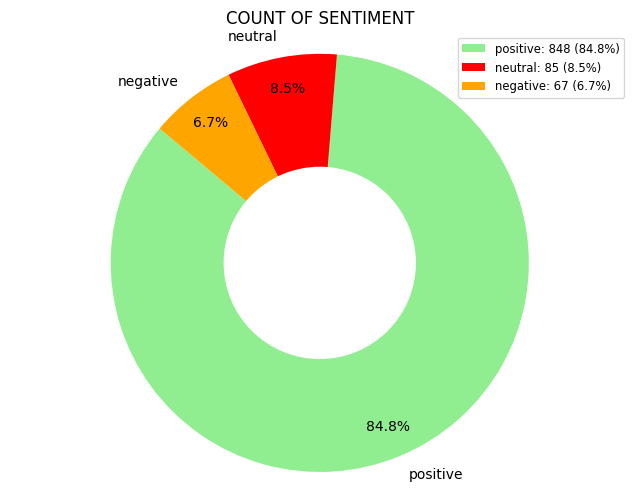

In [53]:
value_counts = df['Sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
colors = ['lightgreen', 'red', 'orange'] 
fig, ax = plt.subplots(figsize=(8, 6))
outer_circle = plt.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
inner_circle = plt.pie([1], radius=0.46, colors=['white'])
# Display count and percentage on each segment
legend_labels = [f"{category}: {count} ({value_counts[category] / len(df) * 100:.1f}%)" for category, count in zip(value_counts.index, value_counts)]
plt.legend(legend_labels, loc='best', fontsize='small')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('COUNT OF SENTIMENT')
plt.show()

In [54]:
negative['Timestamp'] = negative['Time'].apply(lambda x: datetime.utcfromtimestamp(x))
negative.drop(columns=['Time'], inplace=True)

neutral['Timestamp'] = neutral['Time'].apply(lambda x: datetime.utcfromtimestamp(x))
neutral.drop(columns=['Time'], inplace=True)

positive['Timestamp'] = positive['Time'].apply(lambda x: datetime.utcfromtimestamp(x))
positive.drop(columns=['Time'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5172\3426782618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative['Timestamp'] = negative['Time'].apply(lambda x: datetime.utcfromtimestamp(x))
C:\Users\HP\AppData\Local\Temp\ipykernel_5172\3426782618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative.drop(columns=['Time'], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_5172\3426782618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

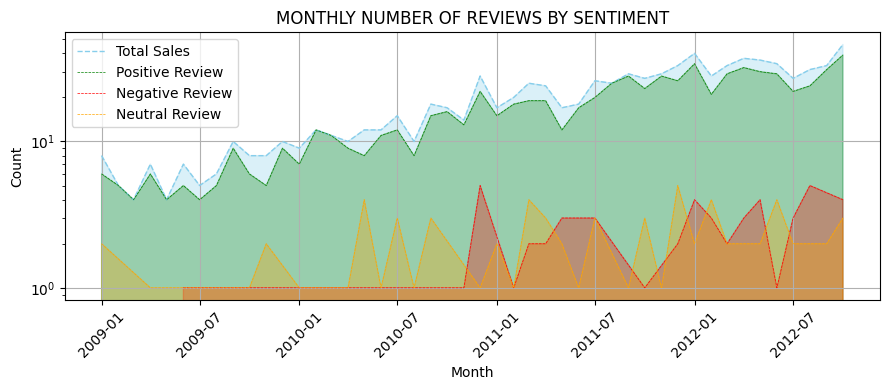

In [55]:
df_after_2009 = df[df['Timestamp'].dt.year >= 2009]
positive_df_after_2009 = positive[positive['Timestamp'].dt.year >= 2009]
negative_df_after_2009 = negative[negative['Timestamp'].dt.year >= 2009]
neutral_df_after_2009 = neutral[neutral['Timestamp'].dt.year >= 2009]

# Group by month
sales_by_month = df_after_2009.groupby(df_after_2009['Timestamp'].dt.to_period('M')).count()
positive_sales_by_month = positive_df_after_2009.groupby(positive_df_after_2009['Timestamp'].dt.to_period('M')).count()
negative_sales_by_month = negative_df_after_2009.groupby(negative_df_after_2009['Timestamp'].dt.to_period('M')).count()
neutral_sales_by_month = neutral_df_after_2009.groupby(neutral_df_after_2009['Timestamp'].dt.to_period('M')).count()

fig, ax = plt.subplots(figsize=(9, 4))

plt.yscale('log')

plt.plot(sales_by_month.index.to_timestamp(), sales_by_month['Id'],linewidth=1, color='skyblue', linestyle='--', label='Total Sales')
plt.fill_between(sales_by_month.index.to_timestamp(), sales_by_month['Id'], color='skyblue', alpha=0.3)

# Plot positive sales line
plt.plot(positive_sales_by_month.index.to_timestamp(), positive_sales_by_month['Id'], linestyle='--',linewidth=0.5, color='green', label='Positive Review')
plt.fill_between(positive_sales_by_month.index.to_timestamp(), positive_sales_by_month['Id'], color='green', alpha=0.3)

# Plot negative sales line
plt.plot(negative_sales_by_month.index.to_timestamp(), negative_sales_by_month['Id'], linestyle='--',linewidth=0.5, color='red', label='Negative Review')
plt.fill_between(negative_sales_by_month.index.to_timestamp(), negative_sales_by_month['Id'], color='red', alpha=0.3)

# Plot neutral sales line
plt.plot(neutral_sales_by_month.index.to_timestamp(), neutral_sales_by_month['Id'], linestyle='--',linewidth=0.5, color='orange', label='Neutral Review')
plt.fill_between(neutral_sales_by_month.index.to_timestamp(), neutral_sales_by_month['Id'], color='orange', alpha=0.3)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('MONTHLY NUMBER OF REVIEWS BY SENTIMENT')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display legend
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
df_after_2009.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Sentiment,Timestamp
1,484737,B000PUOPTM,A24E398DUHR3E1,Beachlurk,0,0,5,Best Rice Cake Ever,"More like a cracker than a rice cake, crunchy ...",positive,2011-03-14
2,278547,B0012YGT9O,A3VQNTQORQBETW,Eric,1,1,5,NIce BIG leaf plant for inhouse,The plant came small and seems weak after the ...,positive,2011-10-13
3,110790,B001EO7MHA,AV0IA7CFRP3JZ,Lorne B. Horst,0,0,5,Olive Oil at it's finest!,I thoroughly enjoyed this EVOO and the decorat...,positive,2012-04-26


In [58]:
category  = ['Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6']

random = np.random.choice(category, size=len(df))
df['Category'] = random

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Sentiment,Timestamp,Category
0,224779,B0002D1590,A2FNPSXF7HPDNL,A. Ackerman,0,0,5,A bit pricey,"for 4 bottles, the Iron Chef website sells it ...",negative,2007-11-11,Cat6
1,484737,B000PUOPTM,A24E398DUHR3E1,Beachlurk,0,0,5,Best Rice Cake Ever,"More like a cracker than a rice cake, crunchy ...",positive,2011-03-14,Cat5
2,278547,B0012YGT9O,A3VQNTQORQBETW,Eric,1,1,5,NIce BIG leaf plant for inhouse,The plant came small and seems weak after the ...,positive,2011-10-13,Cat2
3,110790,B001EO7MHA,AV0IA7CFRP3JZ,Lorne B. Horst,0,0,5,Olive Oil at it's finest!,I thoroughly enjoyed this EVOO and the decorat...,positive,2012-04-26,Cat6
4,96331,B001EO5XK8,A32HSNK0YR0179,Kari,0,0,5,Fabulous Teas,These Teas are the best. Cannot live without t...,positive,2011-06-16,Cat1


In [60]:
pivot_table = pd.pivot_table(df, values='Id', index='Category', columns='Sentiment', aggfunc='count')
stacked_df = pivot_table.reset_index()

In [62]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Sentiment,Timestamp,Category
0,224779,B0002D1590,A2FNPSXF7HPDNL,A. Ackerman,0,0,5,A bit pricey,"for 4 bottles, the Iron Chef website sells it ...",negative,2007-11-11,Cat6
1,484737,B000PUOPTM,A24E398DUHR3E1,Beachlurk,0,0,5,Best Rice Cake Ever,"More like a cracker than a rice cake, crunchy ...",positive,2011-03-14,Cat5
2,278547,B0012YGT9O,A3VQNTQORQBETW,Eric,1,1,5,NIce BIG leaf plant for inhouse,The plant came small and seems weak after the ...,positive,2011-10-13,Cat2


In [67]:
stacked_df

Sentiment,Category,negative,neutral,positive
0,Cat1,9,21,149
1,Cat2,12,15,133
2,Cat3,11,12,139
3,Cat4,12,9,141
4,Cat5,12,9,130
5,Cat6,11,19,156


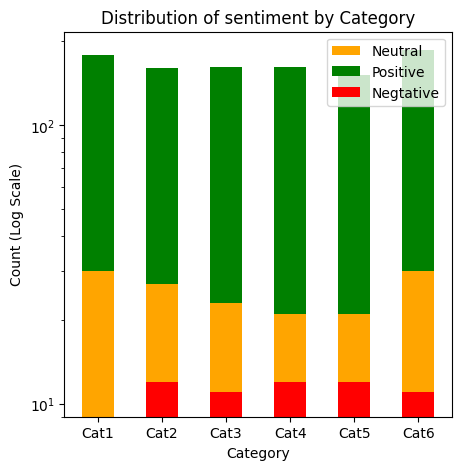

In [82]:
df1 = stacked_df.copy()

# Create a stacked bar chart
plt.figure(figsize=(5, 5))
plt.bar(df1['Category'], df1['neutral'],width=0.5, bottom=df1['negative'], label='Neutral', color='orange')
plt.bar(df1['Category'], df1['positive'], width=0.5,bottom=df1['negative']+df1['neutral'], label='Positive', color='green')
plt.bar(df1['Category'], df1['negative'], width=0.5,label='Negtative', color='red')

# Add a title and labels
plt.title('Distribution of sentiment by Category')
plt.xlabel('Category')
plt.ylabel('Count (Log Scale)')
plt.yscale('log')

plt.legend()
plt.show()

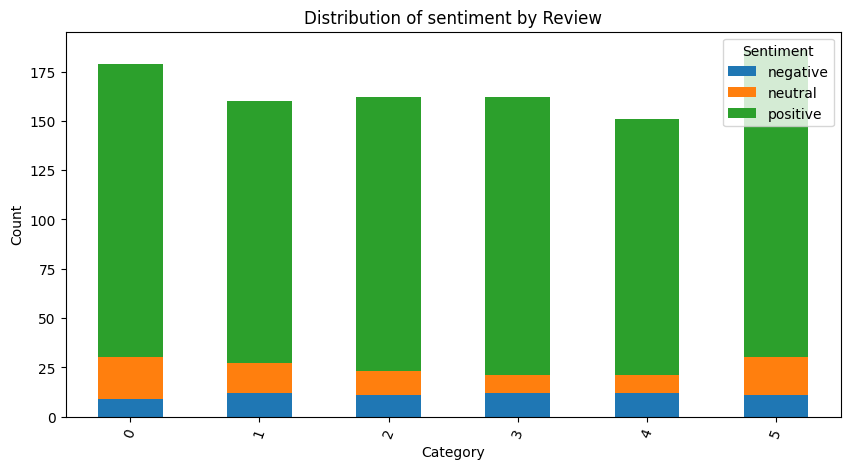

In [66]:
# Create a stacked bar chart
stacked_df.plot.bar(stacked=True, figsize=(10, 5))

# Add a title and labels
plt.title('Distribution of sentiment by Review')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=70)

# Show the plot
plt.show()

In [27]:
text = "Your text goes here"

# Create a WordCloud object
word_cloud = WordCloud(width=800, height=400, margin=0).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

ValueError: Only supported for TrueType fonts

In [27]:
grouped = df.groupby('Score')['Sentiment'].nunique()
grouped

Score
1    3
2    3
3    3
4    3
5    3
Name: Sentiment, dtype: int64

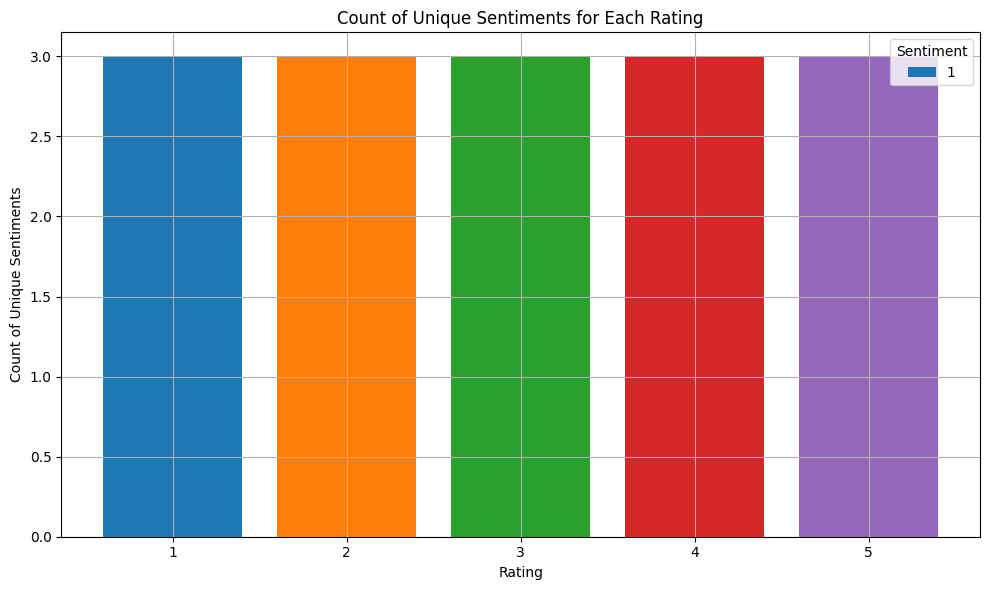

In [28]:
grouped = df.groupby('Score')['Sentiment'].nunique()

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
plt.bar(grouped.index, grouped.values, color=colors)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Count of Unique Sentiments')
plt.title('Count of Unique Sentiments for Each Rating')
plt.xticks(grouped.index)

# Add legend
plt.legend(['1', '2', '3', '4', '5'], title='Sentiment')

plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
sales_by_month

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score
Timestamp,,,,
2005,140395,2,2,5
2006,4008843,29,50,55
2007,11473867,261,279,161
2008,17642862,174,196,277
2009,25311803,423,475,409
2010,43305505,410,526,624
2011,80777642,430,521,1247
2012,97438466,176,241,1437


In [79]:
df['Timestamp'] = df['Timestamp'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      1000 non-null   int64         
 1   ProductId               1000 non-null   object        
 2   UserId                  1000 non-null   object        
 3   ProfileName             1000 non-null   object        
 4   HelpfulnessNumerator    1000 non-null   int64         
 5   HelpfulnessDenominator  1000 non-null   int64         
 6   Score                   1000 non-null   int64         
 7   Summary                 1000 non-null   object        
 8   Text                    1000 non-null   object        
 9   Sentiment               1000 non-null   object        
 10  Timestamp               1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 86.1+ KB


In [30]:
cloud = []
corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['Text'])
    review = review.lower().split()
    cloud_word = [word for word in review if not word in stpwrds]
    cloud_word = ' '.join(cloud_word)
    cloud.append(cloud_word)
    review = [stemmer.stem(word) for word in review if not word in stpwrds]
    review = ' '.join(review)
    corpus.append(review)
    
print(corpus)

['dog prefer one mani one tri small bite perfect size bought one mani time pretti pleas consist', 'use agav nectar light exclus substitut cane sugar dissolv quickli hot cold liquid use cook light nectar distinct tast like wish knew long term side effect might continu use br guess obes might side effect use much', 'tangi ginger flavor pleas sens take small amount make delici cup hot tea ice tea pitcher refriger', 'end case stephen chocol rasberri case stephen french vanilla br cocoa realli want believ posit feedback never believ br read right br guess st thing look cocoa liquid bodi seem br wateri weak look like fat soymilk br ad recommend amount serv size still br br impress way powder glob togeth clump stuck spoon yuk br serv get packet standard cocoa cent sale br amount serv br grant amazon price better manufactur websit sinc ship br ship premium stephen gourmet br would say unless tri somehow elsewher first bother wast money buy br lb cocoa mix one time might end like br sigh br giv

In [33]:
words = ' '.join([i for i in df['Text']])
words

'Both of my dogs prefer this one over many other ones I\'ve tried. The small bites are perfect for their size. I\'ve bought this one many times and have been pretty pleased with the consistency. I now use Agave Nectar Light exclusively as a substitute for cane sugar. It dissolves quickly in hot or cold liquids and can be used in cooking. The Light Nectar does not have a distinct taste which I like. Only wish I knew what the long term side effects, if any, might be for continued use.<br />Guess obesity might be a side effect if you use too much. tangy ginger flavor - very pleasing to the senses; only takes a small amount to make a delicious cup of hot tea or iced tea in a pitcher for the refrigerator Ended up with a case of the Stephen\'s chocolate rasberry and a case of the Stephen\'s French Vanilla<br />"cocoa."  I really wanted to believe the 100% positive feedback on here, but you should never believe<br />what you read, right?<br />I guess the 1st thing I look for in a cocoa is tha

In [36]:
wc = WordCloud(background_color='white', max_words=30)

plt.figure(figsize=(18,10))
plt.imshow(wc.generate(words), interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: Only supported for TrueType fonts

<Figure size 1800x1000 with 0 Axes>